In [3]:
import random
import copy

def load_data(file_name: str) -> tuple[list[tuple[int, int]], int]:
    """
    Loads knapsack data from a file.

    Parameters:
    - file_name (str): The file containing item weights and values.

    Returns:
    - tuple: A list of (weight, value) pairs and the maximum weight.
    """
    weights_and_values = []
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines[1:-1]:  # Ignore first and last line
            parts = line.split()
            weights_and_values.append((int(parts[2]), int(parts[1])))  # (weight, value)

        max_weight = int(lines[-1].strip())  # Extract max weight
    return weights_and_values, max_weight


def evaluate_solution(solution: list[int], items: list[tuple[int, int]], max_weight: int) -> int:
    """
    Evaluates a solution based on its total value while ensuring it is within the weight limit.

    Returns:
    - int: The total value of the solution, or 0 if it exceeds the weight limit.
    """
    total_weight = sum(solution[i] * items[i][0] for i in range(len(items)))
    total_value = sum(solution[i] * items[i][1] for i in range(len(items)))

    return total_value if total_weight <= max_weight else 0



def generate_random_solution(n, max_weight, items) -> list[int]:
    weight = max_weight + 1
    while weight > max_weight:
        solution = [random.randint(0, 1) for _ in range(n)]
        weight = sum(solution[i] * items[i][0] for i in range(n))
    return solution


def random_hill_climb(items: list[tuple[int, int]], max_weight: int, max_iterations: int = 1000) -> tuple[list[int], int]:
    """
    Performs Random Hill-Climbing for the knapsack problem.

    Parameters:
    - items (list[tuple[int, int]]): List of (weight, value) pairs.
    - max_weight (int): Maximum allowable weight.
    - max_iterations (int): Maximum number of iterations.

    Returns:
    - tuple: The best solution found and its value.
    """
    n = len(items)

    best_solution = generate_random_solution(n, max_weight, items)
    best_value = evaluate_solution(best_solution, items, max_weight)

    for _ in range(max_iterations):
        new_solution = best_solution[:]
        flip_index = random.randint(0, n - 1)
        new_solution[flip_index] = 1 - new_solution[flip_index]

        new_value = evaluate_solution(new_solution, items, max_weight)

        if new_value >= best_value:
            best_solution, best_value = new_solution, new_value

    return best_solution, best_value


items200, max_weight200 = load_data("rucsac-200.txt")

best_solution, best_value = random_hill_climb(items200, max_weight200, max_iterations=5000)

print("Best Solution:", best_solution)
print("Best Value:", best_value)


best_solution, best_value = random_hill_climb(items200, max_weight200, max_iterations=100)

print("Best Solution:", best_solution)
print("Best Value:", best_value)



Best Solution: [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Best Value: 131586
Best Solution: [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1

# NEXT ASCENT HILL-CLIMBING (NAHC)

1. Choose a string at random. Call this string current−hilltop.

2. For i from 1 to l (where l is the length of the string), flip bit i; if this results in a fitness
increase, keep the new string, otherwise flip bit i; back. As soon as a fitness increase is
found, set current−hilltop to that increased−ϐitness string without evaluating any more bit
flips of the original string. Go to step 2 with the new current−hilltop, but continue mutating
the new string starting immediately after the bit position at which the previous fitness
increase was found.

3. If no increases in fitness were found, save current−hilltop and go to step 1.

4. When a set number of function evaluations has been performed, return the highest hilltop
that was found.


In [4]:
def next_ascent_hill_climb(items: list[tuple[int, int]], max_weight: int, max_iterations: int = 1000) -> tuple[list[int], int]:
    n = len(items)

    best_solution = None
    best_value = 0

    for _ in range(max_iterations):
        current_solution = generate_random_solution(n, max_weight, items)
        current_value = evaluate_solution(current_solution, items, max_weight)

        for i in range(n):
            current_solution[i] ^= 1  # Flip the bit
            new_value = evaluate_solution(current_solution, items, max_weight)

            if new_value <= current_value:
                current_solution[i] ^= 1  # Revert change if no improvement
        if best_value < current_value:
            best_solution = current_solution
            best_value = current_value



    return best_solution if best_solution is not None else [], best_value




Experimental Results

To analyze the performance of NAHC, we run it on different problem sizes and varying maximum iterations.

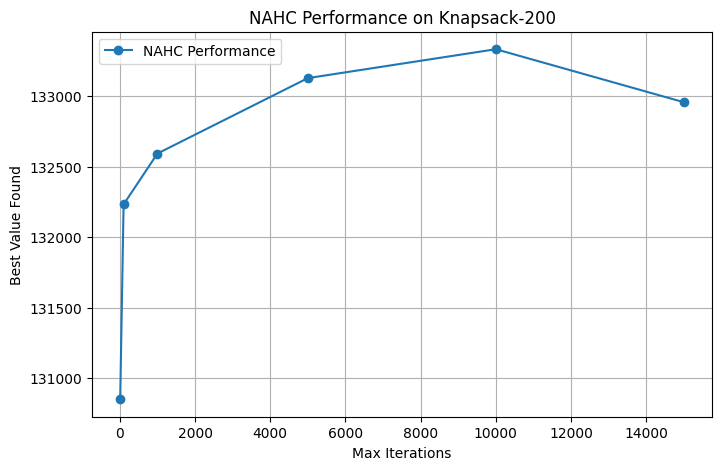

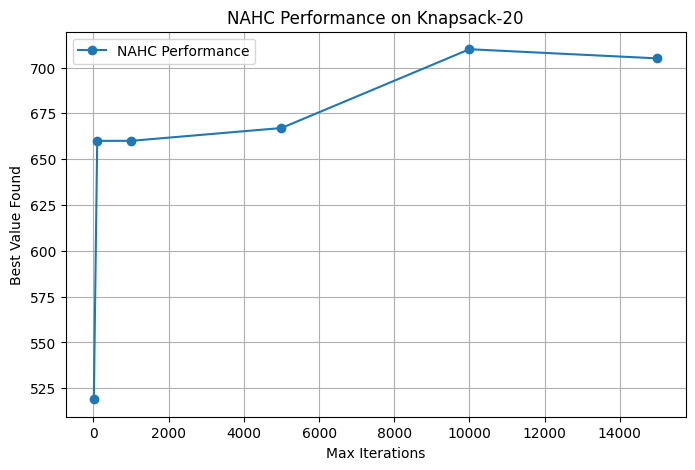

In [5]:
from matplotlib import pyplot as plt

items200, max_weight200 = load_data("rucsac-200.txt")
k_values = [10, 100, 1000, 5000, 10000, 15000]
best_values = []

for k in k_values:
    _, value = next_ascent_hill_climb(items200, max_weight200, max_iterations=k)
    best_values.append(value)

plt.figure(figsize=(8, 5))
plt.plot(k_values, best_values, marker='o', linestyle='-', label='NAHC Performance')
plt.xlabel('Max Iterations')
plt.ylabel('Best Value Found')
plt.title('NAHC Performance on Knapsack-200')
plt.legend()
plt.grid()
plt.show()

items20, max_weight20 = load_data("knapsack-20.txt")
k_values = [10, 100, 1000, 5000, 10000, 15000]
best_values = []

for k in k_values:
    _, value = next_ascent_hill_climb(items20, max_weight20, max_iterations=k)
    best_values.append(value)

plt.figure(figsize=(8, 5))
plt.plot(k_values, best_values, marker='o', linestyle='-', label='NAHC Performance')
plt.xlabel('Max Iterations')
plt.ylabel('Best Value Found')
plt.title('NAHC Performance on Knapsack-20')
plt.legend()
plt.grid()
plt.show()

Conclusion

    The Next Ascent Hill Climbing (NAHC) algorithm improves solution quality as the number of iterations increases but eventually converges, indicating it gets trapped in local optima.
    Knapsack-200 shows a more gradual improvement, suggesting that larger problem instances require more iterations to reach near-optimal solutions.

    Knapsack-20, in contrast, stabilizes quickly, indicating that smaller instances reach their best solutions with fewer iterations.

    Compared to random search, NAHC systematically improves solutions, significantly enhancing performance by following a structured search process.

    However, NAHC's greedy approach leads to early convergence, as it stops at the first improvement rather than exploring further possibilities.

    Despite this limitation, NAHC strikes a good balance between computational efficiency and solution quality, making it a practical heuristic for solving knapsack problems.
